In [7]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

diabetes_data_set = pd.read_csv('../../../datasets/Diabetes_and_LifeStyle_Dataset.csv')
diabetes_data_set

,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,52,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97292,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
97293,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
97294,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
97295,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [2]:
diabetes_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97297 entries, 0 to 97296
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 97297 non-null  int64  
 1   gender                              97297 non-null  object 
 2   ethnicity                           97297 non-null  object 
 3   education_level                     97297 non-null  object 
 4   income_level                        97297 non-null  object 
 5   employment_status                   97297 non-null  object 
 6   smoking_status                      97297 non-null  object 
 7   alcohol_consumption_per_week        97297 non-null  int64  
 8   physical_activity_minutes_per_week  97297 non-null  int64  
 9   diet_score                          97297 non-null  float64
 10  sleep_hours_per_day                 97297 non-null  float64
 11  screen_time_hours_per_day           97297

In [4]:
y = diabetes_data_set['diagnosed_diabetes']
X = diabetes_data_set.copy()
X.drop(['diabetes_stage', 'diagnosed_diabetes'], inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.6,
    random_state=42
)
X_test, X_val, y_test, y_val = train_test_split(
    X_test,
    y_test,
    train_size=0.5,
    random_state=42
)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(58378, 29)
(58378,)
(19459, 29)
(19459,)
(19460, 29)
(19460,)


<Axes: ylabel='Count'>

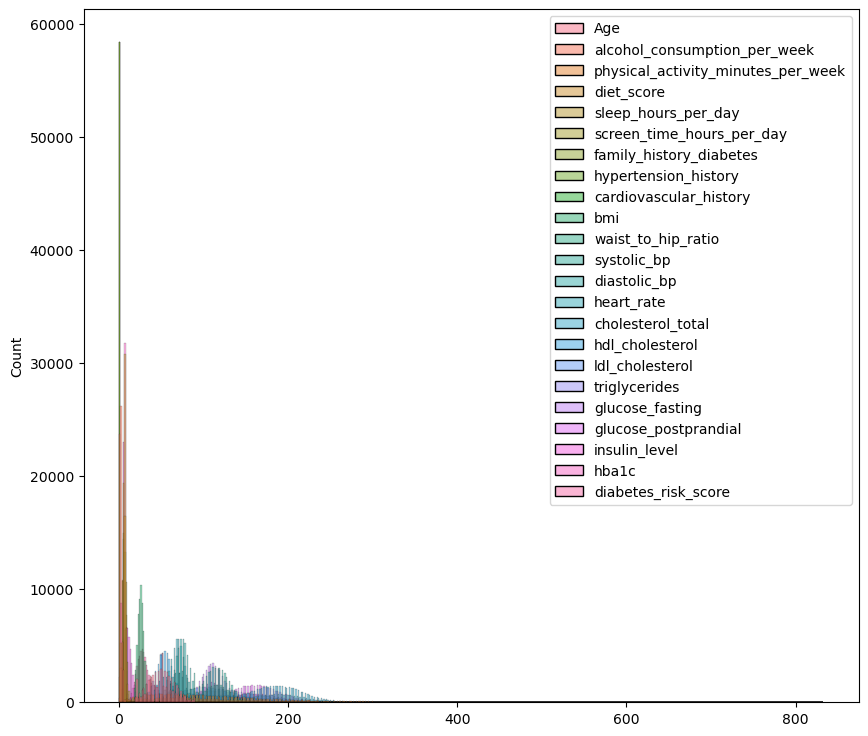

In [8]:
plt.figure(figsize=(10, 9))
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
sns.histplot(X_train[num_cols])

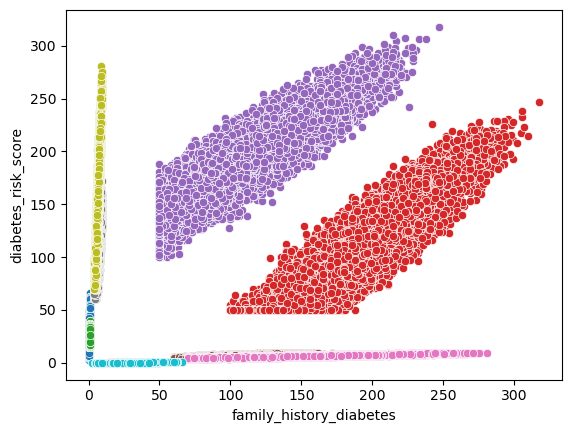

In [23]:
corr_matrix = X_train.corr(numeric_only=True)
corr_cols = set()
for col in num_cols:
    for corr_col in num_cols:
        if corr_col == col:
            continue
        if corr_matrix[col][corr_col] > 0 and corr_matrix[col][corr_col] < 0.6:
            continue
        if corr_matrix[col][corr_col] < 0 and corr_matrix[col][corr_col] > -0.6:
            continue
        sns.scatterplot(X_train, x=col, y=corr_col)
        plt.figure()